# **Name: Varun Magotra**
# **Roll Number: 14**
# **Batch: A**

# Lab 3: Data Classification

In [ ]:
import nltk
import random
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Load Dataset

In [ ]:
"""
    Fetching the appropriate fields from the data
"""
documents=[(list(movie_reviews.words(fileid)),category)
          for category in movie_reviews.categories()
          for fileid in movie_reviews.fileids(category)]

In [ ]:
#Shuffling the data for reducing the baising which one get while trainging the classifier
random.shuffle(documents)

In [ ]:
all_words=[]
#Converting the dataset into the lower form dataset
for w in movie_reviews.words():
    all_words.append(w.lower())

#Using FrequencyDistribution to check frequency of words in the data
all_words=nltk.FreqDist(all_words)

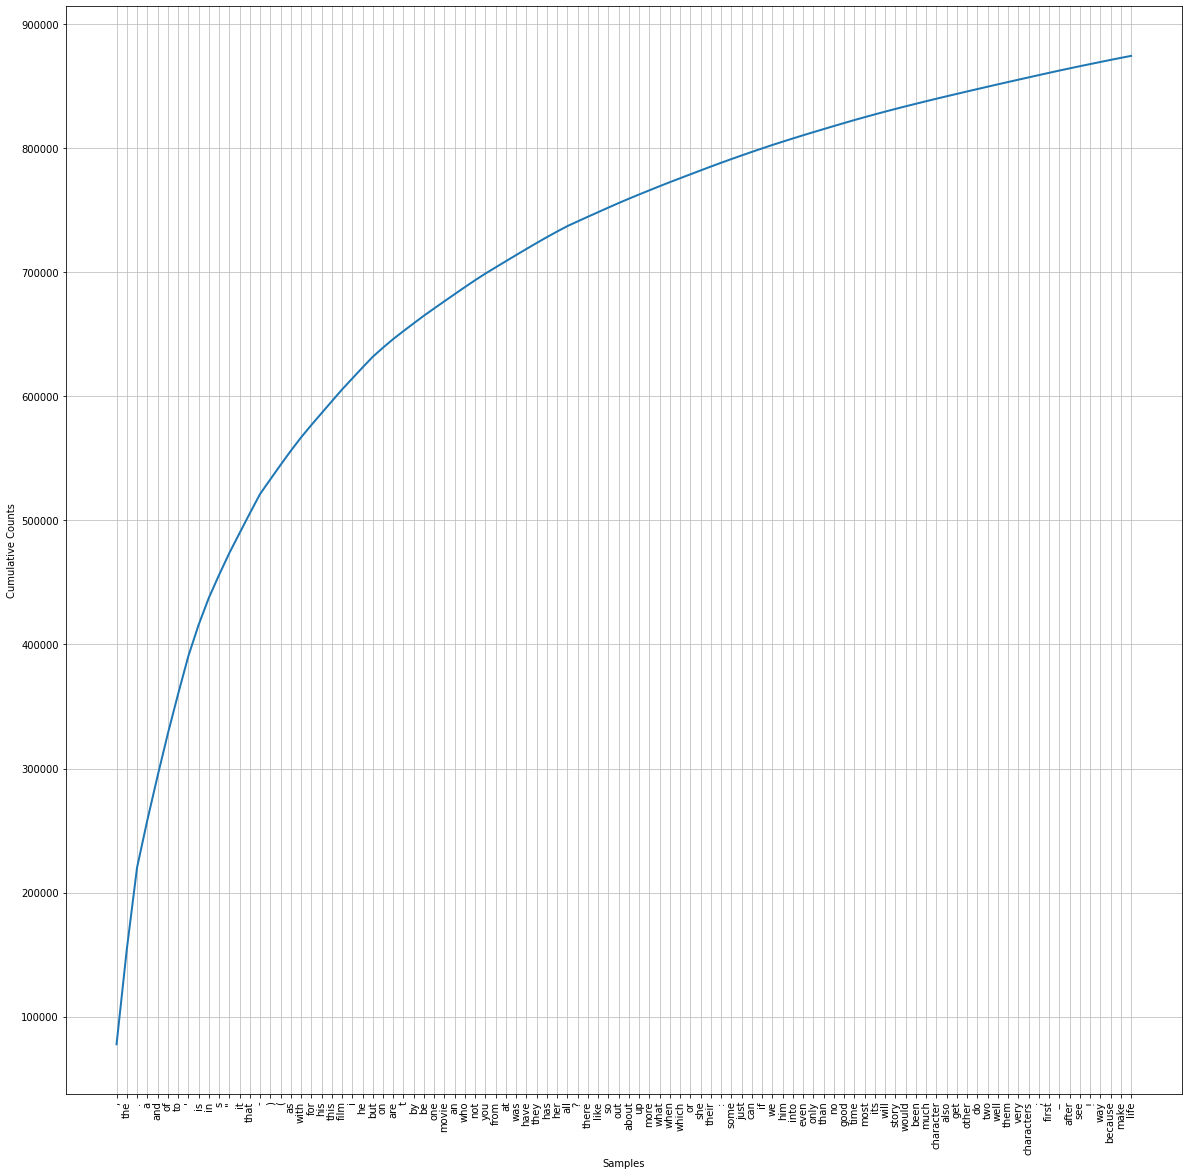

In [ ]:
#Plotting the first 100 most frequent common words
plt.figure(figsize=(20,20))

all_words.plot(100,cumulative=True)

In [ ]:
# import pandas  as pd
# string = pd.Series(all_words.keys()).str.cat(sep='  ')
# string

'plot  :  two  teen  couples  go  to  a  church  party  ,  drink  and  then  drive  .  they  get  into  an  accident  one  of  the  guys  dies  but  his  girlfriend  continues  see  him  in  her  life  has  nightmares  what  \'  s  deal  ?  watch  movie  "  sorta  find  out  critique  mind  -  fuck  for  generation  that  touches  on  very  cool  idea  presents  it  bad  package  which  is  makes  this  review  even  harder  write  since  i  generally  applaud  films  attempt  break  mold  mess  with  your  head  such  (  lost  highway  &  memento  )  there  are  good  ways  making  all  types  these  folks  just  didn  t  snag  correctly  seem  have  taken  pretty  neat  concept  executed  terribly  so  problems  well  its  main  problem  simply  too  jumbled  starts  off  normal  downshifts  fantasy  world  you  as  audience  member  no  going  dreams  characters  coming  back  from  dead  others  who  look  like  strange  apparitions  disappearances  looooot  chase  scenes  tons  we

In [ ]:
# #creating the list of first 2500 common words
# word_features=list(all_words.keys())[:2500]
# # list(all_words.items())[:10]

In [ ]:
# #Function for creating the feature dataset
# """
#      Here using TOP-N-WORD approach for feature extraction
# """
# def features_finder(doc):
#     words=set(doc)
#     features={}
#     for w in word_features:
#         features[w]=(w in words)
        
#     return features

In [ ]:
# feature=[(features_finder(rev),category) for(rev,category) in documents]

## Extracting Labels from the data

In [ ]:
"""
Using Bag Of Word Feature approach for feature extraction 

"""

positive_review=[]
for fileid in movie_reviews.fileids('pos'):
    words=movie_reviews.words(fileid)
    positive_review.append(words)

negative_review=[]

for fileid in movie_reviews.fileids('neg'):
    word=movie_reviews.words(fileid)
    negative_review.append(word)




In [ ]:
stopword_english=stopwords.words('english')

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Data Cleaning

In [ ]:
def features_finder(doc):
    word_clean=[]
    
    for word in doc:
            # print(word)
            if word not in stopword_english and word not in string.punctuation :
                word_clean.append(word.lower())
    word_dictonary=dict([word,True] for word in word_clean)
    return word_dictonary

In [ ]:
positive_review_set=[]
for word in positive_review:
    # print(word)
    positive_review_set.append((features_finder(word),'pos'))
    
negative_review_set=[]
for word in negative_review:
    negative_review_set.append((features_finder(word),'neg'))



In [ ]:
# #Training and testing dataset is being created
# training_set=feature[:1800]
# test_set=feature[1800:]

In [ ]:
random.shuffle(positive_review_set)
random.shuffle(negative_review_set)


# Data Splitting for Training and Testing

In [ ]:
training_set=positive_review_set[:800]+negative_review_set[:800]
test_set=positive_review_set[800:]+negative_review_set[800:]


# Loading All the models and Checking their Accuracy

In [ ]:
#NaiveBayesClassifier for calssification
classifier=nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
print("NaiveBayesClassifier Acuuracy",(nltk.classify.accuracy(classifier,test_set))*100)

NaiveBayesClassifier Acuuracy 71.5


In [ ]:
classifier.show_most_informative_features()

Most Informative Features
                  finest = True              pos : neg    =     25.7 : 1.0
               insulting = True              neg : pos    =     14.3 : 1.0
                  seagal = True              neg : pos    =     11.7 : 1.0
               showgirls = True              neg : pos    =     11.0 : 1.0
                dazzling = True              pos : neg    =     11.0 : 1.0
                    slip = True              pos : neg    =     10.3 : 1.0
                  avoids = True              pos : neg    =     10.3 : 1.0
              astounding = True              pos : neg    =     10.3 : 1.0
              unoriginal = True              neg : pos    =     10.3 : 1.0
               fashioned = True              pos : neg    =      9.8 : 1.0


In [ ]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC,NuSVC

In [ ]:
#Using Various Machine Learning Algorithm on the dataset 
MNB_classfier=SklearnClassifier(MultinomialNB())
MNB_classfier.train(training_set)

BNB_classifier=SklearnClassifier(BernoulliNB())
BNB_classifier.train(training_set)

Logistic_calssifier=SklearnClassifier(LogisticRegression())
Logistic_calssifier.train(training_set)

SGD_classifier=SklearnClassifier(SGDClassifier())
SGD_classifier.train(training_set)

SVC_classifier=SklearnClassifier(SVC())
SVC_classifier.train(training_set)

LineraSVC_classifer=SklearnClassifier(LinearSVC())
LineraSVC_classifer.train(training_set)

NuSVC_classifer=SklearnClassifier(NuSVC())
NuSVC_classifer.train(training_set)



<SklearnClassifier(NuSVC())>

In [ ]:
"""
    Printing the Accuracy of the Respective Algorithm on the Dataset
"""
print("MNB_classfier Acuuracy",(nltk.classify.accuracy(MNB_classfier,test_set))*100)
print("BNB_classifier Acuuracy",(nltk.classify.accuracy(BNB_classifier,test_set))*100)
print("SGD_classifier Acuuracy",(nltk.classify.accuracy(SGD_classifier,test_set))*100)
print("SVC_classifier Acuuracy",(nltk.classify.accuracy(SVC_classifier,test_set))*100)
print("LinearSVC_classifer Acuuracy",(nltk.classify.accuracy(LineraSVC_classifer,test_set))*100)
print("NuSVC_classifer Acuuracy",(nltk.classify.accuracy(NuSVC_classifer,test_set))*100)


MNB_classfier Acuuracy 81.75
BNB_classifier Acuuracy 78.5
SGD_classifier Acuuracy 85.5
SVC_classifier Acuuracy 86.25
LinearSVC_classifer Acuuracy 84.75
NuSVC_classifer Acuuracy 86.75


In [ ]:
# custom_review="I hated the film. It was a disaster. Poor direction, bad acting."

In [ ]:
# custom_review_token=nltk.word_tokenize(custom_review)
# custom_review_set=features_finder(custom_review_token)

In [ ]:
# print(NuSVC_classifer.classify(custom_review_set))

# **LDA**

 **Build Model**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)

In [ ]:
lda.fit(training_set, test_set)
print(f"Training Score : {lda.score(training_set, test_set)}")
print(f"Test Score : {lda.score(training_set, test_set)}")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Training Score : 1.0
Test Score : 0.6448598130841121


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


# **Evaluation Metric (Accuracy, Confusion Matrix)**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Mean Absolute Error: 0.35514018691588783
Accuracy: 0.6448598130841121
              precision    recall  f1-score   support

           0      0.626     0.609     0.617       302
           1      0.661     0.676     0.669       340

    accuracy                          0.645       642
   macro avg      0.643     0.643     0.643       642
weighted avg      0.644     0.645     0.645       642



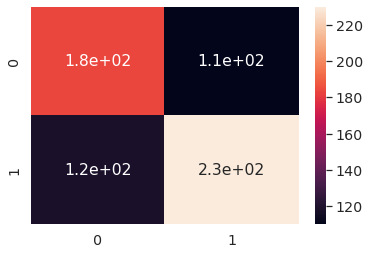

In [ ]:
test_pred = lda.predict(test_set)
print('Mean Absolute Error:', metrics.mean_absolute_error(test_set, test_pred))
print('Accuracy: %s' % metrics.accuracy_score(test_set, test_pred))
print(metrics.classification_report(test_set, test_pred, digits=3))
cm = metrics.confusion_matrix(test_pred, test_set)
sns.set(font_scale=1.3)
sns.heatmap(cm, annot=True)
plt.show()

# **Conclusion**

1. IMDB dataset used in this experiment needs preprocessing operations such as cleaning, lower words, stopwords and conversion of the data into corpus data for training classification model on it.
2. The Naive Bayes model outperformed LDA with accuracy of 71.3 % on this dataset before dimensionality reduction. The accuracy of LDA came out to be 64.44 %.
